In [1]:
try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


## Short Distance

In [0]:
### build the dataset
# This is a nonlinear AND long-distance dataset
# (Actually, we will test long-distance vs. short-distance patterns)

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) # short distance
#   y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

### Linear Model

In [3]:
# Try a linear model first - note: it is classification now!
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the network
r = model.fit(
  X, Y,
  epochs=100,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 2s 848us/sample - loss: 0.8141 - accuracy: 0.4848 - val_loss: 0.7300 - val_accuracy: 0.4972
Epoch 2/100
2500/2500 [==============================] - 0s 194us/sample - loss: 0.7041 - accuracy: 0.4984 - val_loss: 0.6955 - val_accuracy: 0.5012
Epoch 3/100
2500/2500 [==============================] - 1s 209us/sample - loss: 0.6951 - accuracy: 0.5092 - val_loss: 0.6942 - val_accuracy: 0.5064
Epoch 4/100
2500/2500 [==============================] - 0s 194us/sample - loss: 0.6938 - accuracy: 0.5144 - val_loss: 0.6955 - val_accuracy: 0.5140
Epoch 5/100
2500/2500 [==============================] - 0s 196us/sample - loss: 0.6941 - accuracy: 0.5108 - val_loss: 0.6938 - val_accuracy: 0.5044
Epoch 6/100
2500/2500 [==============================] - 1s 211us/sample - loss: 0.6939 - accuracy: 0.5240 - val_loss: 0.6942 - val_accuracy: 0.5076
Epoch 7/100
2500/2500 [==============================] - 0

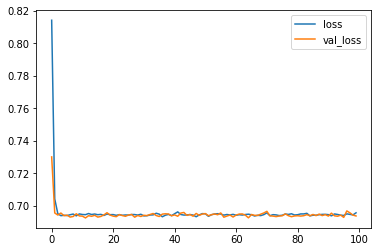

In [4]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

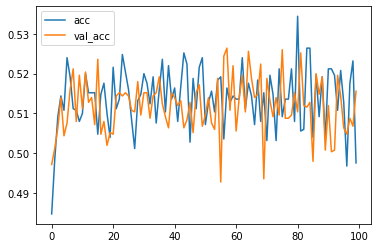

In [5]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

### Simple RNN

In [0]:
# Now try a simple RNN
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
# x = LSTM(5)(i)
x = SimpleRNN(5)(i)
# x = GRU(5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  # optimizer='rmsprop',
#   optimizer='adam',
  optimizer=Adam(lr=0.01),
  # optimizer=SGD(lr=0.1, momentum=0.9),
  metrics=['accuracy'],
)

In [7]:
# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 2s 983us/sample - loss: 0.6910 - accuracy: 0.5372 - val_loss: 0.6823 - val_accuracy: 0.5884
Epoch 2/200
2500/2500 [==============================] - 1s 472us/sample - loss: 0.6737 - accuracy: 0.6024 - val_loss: 0.6630 - val_accuracy: 0.6228
Epoch 3/200
2500/2500 [==============================] - 1s 486us/sample - loss: 0.6344 - accuracy: 0.6736 - val_loss: 0.6023 - val_accuracy: 0.7204
Epoch 4/200
2500/2500 [==============================] - 1s 469us/sample - loss: 0.5776 - accuracy: 0.7392 - val_loss: 0.5439 - val_accuracy: 0.7644
Epoch 5/200
2500/2500 [==============================] - 1s 496us/sample - loss: 0.5233 - accuracy: 0.7660 - val_loss: 0.4828 - val_accuracy: 0.7884
Epoch 6/200
2500/2500 [==============================] - 1s 488us/sample - loss: 0.4642 - accuracy: 0.7992 - val_loss: 0.4212 - val_accuracy: 0.8232
Epoch 7/200
2500/2500 [==============================] - 1

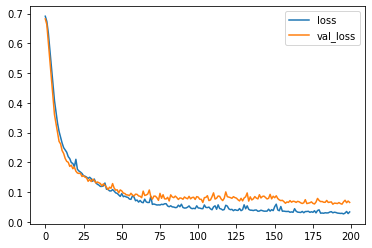

In [8]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

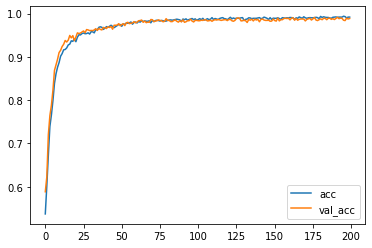

In [9]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

## Long Distance

In [0]:
# Now change to the long distance problem

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

### Simple RNN

In [11]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.7034 - accuracy: 0.4940 - val_loss: 0.6981 - val_accuracy: 0.4932
Epoch 2/200
2500/2500 [==============================] - 1s 484us/sample - loss: 0.6955 - accuracy: 0.5044 - val_loss: 0.6963 - val_accuracy: 0.4776
Epoch 3/200
2500/2500 [==============================] - 1s 487us/sample - loss: 0.6939 - accuracy: 0.5088 - val_loss: 0.6970 - val_accuracy: 0.4880
Epoch 4/200
2500/2500 [==============================] - 1s 474us/sample - loss: 0.6950 - accuracy: 0.5124 - val_loss: 0.6926 - val_accuracy: 0.5140
Epoch 5/200
2500/2500 [==============================] - 1s 483us/sample - loss: 0.6946 - accuracy: 0.5052 - val_loss: 0.6960 - val_accuracy: 0.4936
Epoch 6/200
2500/2500 [==============================] - 1s 481us/sample - loss: 0.6943 - accuracy: 0.5132 - val_loss: 0.6930 - val_accuracy: 0.5188
Epoch 7/200
2500/2500 [==============================] - 1s 

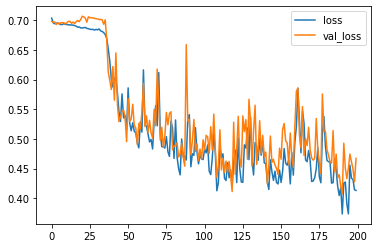

In [12]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

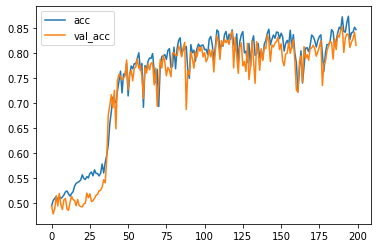

In [13]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

### LSTM

In [14]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 5s 2ms/sample - loss: 0.6938 - accuracy: 0.4876 - val_loss: 0.6949 - val_accuracy: 0.4888
Epoch 2/200
2500/2500 [==============================] - 1s 305us/sample - loss: 0.6930 - accuracy: 0.5016 - val_loss: 0.6956 - val_accuracy: 0.4936
Epoch 3/200
2500/2500 [==============================] - 1s 303us/sample - loss: 0.6931 - accuracy: 0.5020 - val_loss: 0.6950 - val_accuracy: 0.5032
Epoch 4/200
2500/2500 [==============================] - 1s 293us/sample - loss: 0.6934 - accuracy: 0.4912 - val_loss: 0.6949 - val_accuracy: 0.5044
Epoch 5/200
2500/2500 [==============================] - 1s 297us/sample - loss: 0.6919 - accuracy: 0.5072 - val_loss: 0.6936 - val_accuracy: 0.5120
Epoch 6/200
2500/2500 [==============================] - 1s 309us/sample - loss: 0.6918 - accuracy: 0.5132 - val_loss: 0.6945 - val_accuracy: 0.5112
Epoch 7/200
2500/2500 [==============================] - 1s 

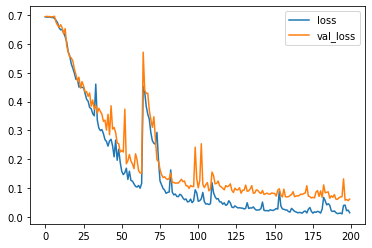

In [15]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

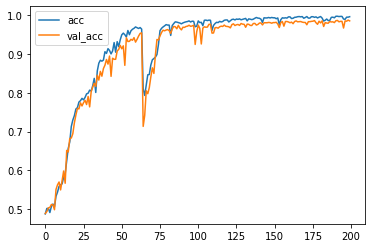

In [16]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

## T = 20, long Distance

In [0]:
# Make the problem harder by making T larger
T = 20
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

### Simple RNN

In [18]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.7064 - accuracy: 0.4892 - val_loss: 0.6950 - val_accuracy: 0.4956
Epoch 2/200
2500/2500 [==============================] - 2s 744us/sample - loss: 0.6963 - accuracy: 0.4888 - val_loss: 0.6939 - val_accuracy: 0.5088
Epoch 3/200
2500/2500 [==============================] - 2s 749us/sample - loss: 0.6944 - accuracy: 0.4948 - val_loss: 0.6932 - val_accuracy: 0.5092
Epoch 4/200
2500/2500 [==============================] - 2s 736us/sample - loss: 0.6966 - accuracy: 0.4872 - val_loss: 0.6926 - val_accuracy: 0.5196
Epoch 5/200
2500/2500 [==============================] - 2s 739us/sample - loss: 0.6945 - accuracy: 0.5020 - val_loss: 0.6943 - val_accuracy: 0.4972
Epoch 6/200
2500/2500 [==============================] - 2s 750us/sample - loss: 0.6943 - accuracy: 0.4848 - val_loss: 0.6929 - val_accuracy: 0.5148
Epoch 7/200
2500/2500 [==============================] - 2s 

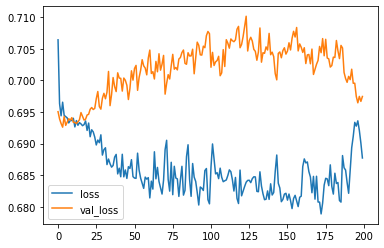

In [19]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

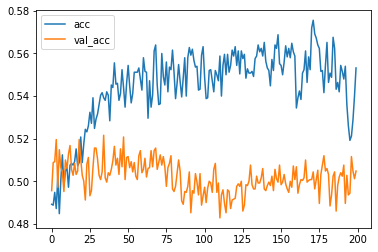

In [20]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

### LSTM

In [21]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6943 - accuracy: 0.5008 - val_loss: 0.6934 - val_accuracy: 0.4976
Epoch 2/200
2500/2500 [==============================] - 1s 348us/sample - loss: 0.6932 - accuracy: 0.5064 - val_loss: 0.6927 - val_accuracy: 0.5224
Epoch 3/200
2500/2500 [==============================] - 1s 345us/sample - loss: 0.6930 - accuracy: 0.5080 - val_loss: 0.6930 - val_accuracy: 0.5016
Epoch 4/200
2500/2500 [==============================] - 1s 335us/sample - loss: 0.6924 - accuracy: 0.5108 - val_loss: 0.6924 - val_accuracy: 0.5032
Epoch 5/200
2500/2500 [==============================] - 1s 342us/sample - loss: 0.6925 - accuracy: 0.5108 - val_loss: 0.6926 - val_accuracy: 0.5144
Epoch 6/200
2500/2500 [==============================] - 1s 341us/sample - loss: 0.6922 - accuracy: 0.5164 - val_loss: 0.6930 - val_accuracy: 0.4940
Epoch 7/200
2500/2500 [==============================] - 1s 

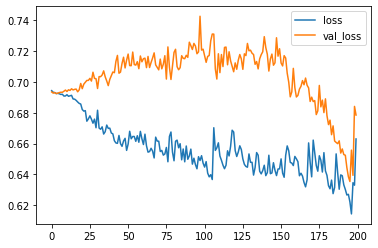

In [22]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

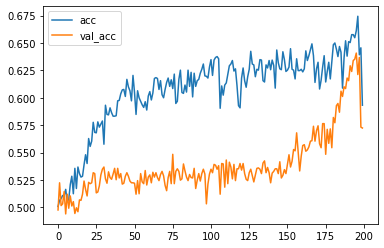

In [23]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

### GRU

In [24]:
# Now test our GRU
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = GRU(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6966 - accuracy: 0.4892 - val_loss: 0.6936 - val_accuracy: 0.4996
Epoch 2/400
2500/2500 [==============================] - 1s 317us/sample - loss: 0.6953 - accuracy: 0.4936 - val_loss: 0.6955 - val_accuracy: 0.4928
Epoch 3/400
2500/2500 [==============================] - 1s 324us/sample - loss: 0.6934 - accuracy: 0.5144 - val_loss: 0.6932 - val_accuracy: 0.5008
Epoch 4/400
2500/2500 [==============================] - 1s 320us/sample - loss: 0.6928 - accuracy: 0.5156 - val_loss: 0.6936 - val_accuracy: 0.5148
Epoch 5/400
2500/2500 [==============================] - 1s 328us/sample - loss: 0.6934 - accuracy: 0.5104 - val_loss: 0.6935 - val_accuracy: 0.5020
Epoch 6/400
2500/2500 [==============================] - 1s 321us/sample - loss: 0.6938 - accuracy: 0.4964 - val_loss: 0.6940 - val_accuracy: 0.5048
Epoch 7/400
2500/2500 [==============================] - 1s 

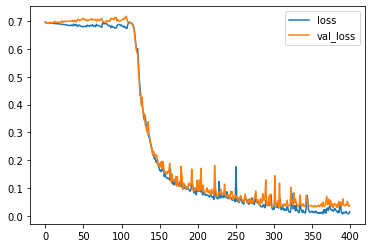

In [25]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

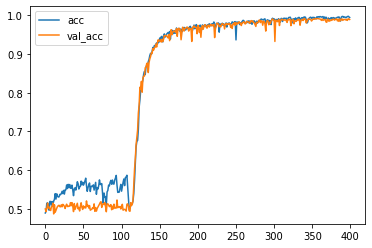

In [26]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

## T = 30, long distance

In [0]:
# Make the problem harder by making T larger
T = 30
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

### LSTM

In [28]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6947 - accuracy: 0.4996 - val_loss: 0.6939 - val_accuracy: 0.4912
Epoch 2/400
2500/2500 [==============================] - 1s 388us/sample - loss: 0.6943 - accuracy: 0.4944 - val_loss: 0.6934 - val_accuracy: 0.4936
Epoch 3/400
2500/2500 [==============================] - 1s 398us/sample - loss: 0.6942 - accuracy: 0.4960 - val_loss: 0.6939 - val_accuracy: 0.5132
Epoch 4/400
2500/2500 [==============================] - 1s 397us/sample - loss: 0.6936 - accuracy: 0.5012 - val_loss: 0.6935 - val_accuracy: 0.5060
Epoch 5/400
2500/2500 [==============================] - 1s 390us/sample - loss: 0.6931 - accuracy: 0.4988 - val_loss: 0.6939 - val_accuracy: 0.4928
Epoch 6/400
2500/2500 [==============================] - 1s 391us/sample - loss: 0.6931 - accuracy: 0.5052 - val_loss: 0.6941 - val_accuracy: 0.4884
Epoch 7/400
2500/2500 [==============================] - 1s 

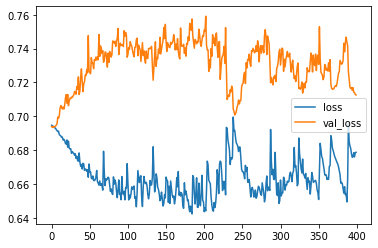

In [29]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

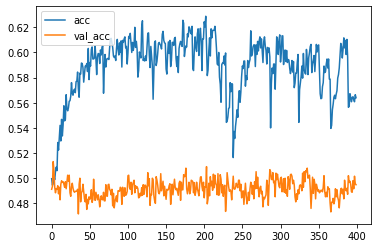

In [30]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

### LSTM + Global Max Pooling

In [31]:
# Now try a LSTM with Global Max Pooling
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 2
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=100,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6953 - accuracy: 0.4904 - val_loss: 0.6930 - val_accuracy: 0.5044
Epoch 2/100
2500/2500 [==============================] - 1s 408us/sample - loss: 0.6934 - accuracy: 0.5032 - val_loss: 0.6924 - val_accuracy: 0.5092
Epoch 3/100
2500/2500 [==============================] - 1s 397us/sample - loss: 0.6902 - accuracy: 0.5320 - val_loss: 0.6938 - val_accuracy: 0.5184
Epoch 4/100
2500/2500 [==============================] - 1s 402us/sample - loss: 0.6904 - accuracy: 0.5332 - val_loss: 0.6847 - val_accuracy: 0.5848
Epoch 5/100
2500/2500 [==============================] - 1s 399us/sample - loss: 0.6891 - accuracy: 0.5340 - val_loss: 0.6881 - val_accuracy: 0.5440
Epoch 6/100
2500/2500 [==============================] - 1s 407us/sample - loss: 0.6884 - accuracy: 0.5524 - val_loss: 0.6848 - val_accuracy: 0.5664
Epoch 7/100
2500/2500 [==============================] - 1s 

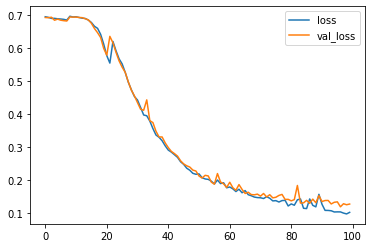

In [32]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

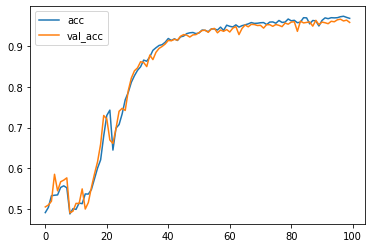

In [33]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()